# **QSAR Model Building of MAO-B Inhibitors**

Quantitative structure-activity relationship (QSAR) is a computational modeling method for revealing relationships between structural properties of chemical compounds and biological activities.

# Read in data

In [15]:
import pandas as pd

In [16]:
dataset = pd.read_csv("bioactivity_data_pIC50_pubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.356547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3931,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3932,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3933,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.524329


In [17]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3931,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3932,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3933,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y = dataset.iloc[:,-1]
Y

0       3.000000
1       3.000000
2       7.744727
3       8.045757
4       8.356547
          ...   
3930    4.301030
3931    4.301030
3932    4.301030
3933    4.524329
3934    4.000000
Name: pIC50, Length: 3935, dtype: float64

# Remove low variance features

In [19]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,...,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821
0,1,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1,1,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,0,...,1,0,0,0,1,1,0,1,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3931,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3932,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3933,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X.to_csv('descriptor_list.csv', index = False)

# LGBM Regression Model

In [21]:
import lightgbm as ltb
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
model = ltb.LGBMRegressor(n_estimators=200,max_depth=40,num_leaves= 31,random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.6808715554279241

## Model Prediction

In [23]:
Y_pred = model.predict(X)
Y_pred

array([3.96362208, 3.52089143, 5.97781339, ..., 4.78002361, 4.81840425,
       4.68970711])

## Model Performance

In [24]:
# for training data
print('Mean squared error (MSE): %.2f'  # Lower the MSE, the closer is forecast to actual
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f' # A higher coefficient indicates a better fit for the model
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.77
Coefficient of determination (R^2): 0.68


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [25]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

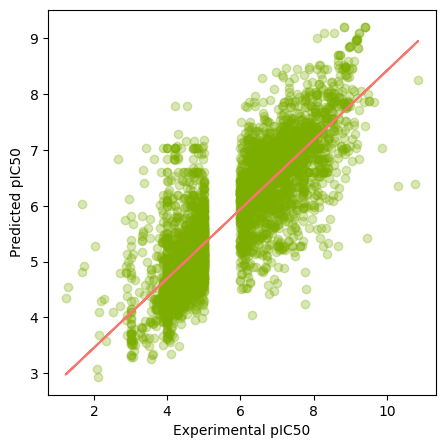

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [27]:
import pickle

In [28]:
pickle.dump(model, open('MAO-B_model.pkl', 'wb'))